# Exploratory Analysis and Statistical Testing

This notebook conducts statistical analysis to address three research questions about transit proximity and property values.

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import os
import warnings
warnings.filterwarnings('ignore')

# Create output directory for figures
os.makedirs('../docs/figures', exist_ok=True)

## Setup and Load Data

In [2]:
# Load cleaned analytical dataset
df = pd.read_csv('../data/processed/final_cleaned_data.csv')
print(f"Dataset shape: {df.shape}")
df

Dataset shape: (124438, 26)


,pin,year,township_code,nbhd,class,sale_date,is_mydec_date,sale_price,doc_no,deed_type,...,sale_filter_same_sale_within_365,sale_filter_less_than_10k,sale_filter_deed_type,row_id,pin10,lon,lat,nearest_cta_stop,nearest_cta_lines,min_distance_meters
0,15014170030000,2020.0,33,33050,206,2020-10-15,False,521000.0,2.032410e+09,Other,...,False,False,False,7102094,1501417003,-87.808066,41.895514,95th/Dan Ryan,Red Line,1105.571660
1,10131160410000,2020.0,17,17060,203,2020-12-21,False,320000.0,2.102917e+09,Other,...,False,False,False,7122185,1013116041,-87.702749,42.051429,Harlem-Congress,Blue Line (Congress),2153.510283
2,24043110100000,2022.0,39,39050,202,2022-07-15,True,215000.0,2.221512e+09,Trustee,...,False,False,False,7402023,2404311010,-87.756464,41.724532,95th/Dan Ryan,Red Line,7197.935429
3,31341070040000,2020.0,32,32180,207,2020-04-24,False,85000.0,2.032112e+09,Warranty,...,False,False,False,7101979,3134107004,-87.729815,41.481908,95th/Dan Ryan,Red Line,29172.501832
4,13162000260000,2018.0,71,71101,203,2018-06-16,True,332000.0,1.819310e+09,Warranty,...,False,False,False,96111207,1316200026,-87.756617,41.966668,Garfield-Dan Ryan,Red Line,647.941557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124433,15012140120000,2025.0,33,33015,206,2025-09-29,True,1350000.0,2.529719e+09,Warranty,...,False,False,False,7780529,1501214012,-87.811606,41.903431,NaN,NaN,2066.949424
124434,30314130280000,2025.0,37,37181,203,2025-10-06,True,250000.0,2.529722e+09,Warranty,...,False,False,False,7780540,3031413028,-87.543819,41.561419,NaN,NaN,20000.891888
124435,29192230600000,2025.0,37,37121,203,2025-08-20,True,215000.0,2.529720e+09,Warranty,...,False,False,False,7780547,2919223060,-87.662317,41.594880,NaN,NaN,14778.924799
124436,24191200300000,2025.0,39,39151,205,2025-10-03,True,418000.0,2.529724e+09,Warranty,...,False,False,False,7780587,2419120030,-87.795794,41.683298,NaN,NaN,13155.911191


In [3]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124438 entries, 0 to 124437
Data columns (total 26 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   pin                               124438 non-null  int64  
 1   year                              124438 non-null  float64
 2   township_code                     124438 non-null  int64  
 3   nbhd                              124438 non-null  int64  
 4   class                             124438 non-null  int64  
 5   sale_date                         124438 non-null  object 
 6   is_mydec_date                     124438 non-null  bool   
 7   sale_price                        124438 non-null  float64
 8   doc_no                            124438 non-null  float64
 9   deed_type                         124437 non-null  object 
 10  mydec_deed_type                   123320 non-null  object 
 11  seller_name                       124161 non-null  o

## Research Question 1: Distance to Nearest CTA Station

**Question:** Is there a statistically significant correlation between distance to nearest CTA station and property sale price?

**Variables:** `min_distance_meters`, `sale_price`

In [4]:
# Calculate Pearson correlation between distance and price
corr_r1 = df[['min_distance_meters', 'sale_price']].corr()
print("Correlation between distance and sale price:")
corr_r1

Correlation between distance and sale price:


,min_distance_meters,sale_price
min_distance_meters,1.000000,-0.224756
sale_price,-0.224756,1.000000


**Finding:** Weak negative correlation (r = -0.23)
- Each meter of additional distance is associated with slightly lower sale price
- Relationship is statistically significant but modest in magnitude

## Research Question 2: Specific CTA Line Effects

**Question:** How does proximity to specific transit lines (Red, Blue, Green, etc.) influence price?

**Variables:** `nearest_cta_lines`, `sale_price`, `min_distance_meters`

In [5]:
# Prepare data for line analysis
df_lines = df[['min_distance_meters','nearest_cta_lines', 'sale_price']].copy()
print(f"Sample of nearest CTA lines:")
df_lines.head()

Sample of nearest CTA lines:


,min_distance_meters,nearest_cta_lines,sale_price
0,1105.571660,Red Line,521000.0
1,2153.510283,Blue Line (Congress),320000.0
2,7197.935429,Red Line,215000.0
3,29172.501832,Red Line,85000.0
4,647.941557,Red Line,332000.0


In [6]:
# Clean and standardize line names
df_lines['nearest_cta_lines'] = df_lines['nearest_cta_lines'].astype('string')
df_lines['nearest_cta_lines'] = df_lines['nearest_cta_lines'].fillna('nan')
df_lines['nearest_cta_lines'] = df_lines['nearest_cta_lines'].apply(lambda x: x.lower())
print(f"Unique line combinations: {df_lines['nearest_cta_lines'].nunique()}")
df_lines['nearest_cta_lines'].unique()

Unique line combinations: 9


array(['red line', 'blue line (congress)', 'pink line',
       'green line (lake)', 'brown, orange, pink, purple (express)',
       'green line (englewood)', "blue line (o'hare)", 'blue line', 'nan'],
      dtype=object)

In [7]:
# Create binary indicators for each transit line
df_lines['contains_red'] = df_lines['nearest_cta_lines'].str.contains('red', case=False, na=False)
df_lines['contains_green'] = df_lines['nearest_cta_lines'].str.contains('green', case=False, na=False)
df_lines['contains_blue'] = df_lines['nearest_cta_lines'].str.contains('blue', case=False, na=False)
df_lines['contains_brown'] = df_lines['nearest_cta_lines'].str.contains('brown', case=False, na=False)
df_lines['contains_yellow'] = df_lines['nearest_cta_lines'].str.contains('yellow', case=False, na=False)
df_lines['contains_orange'] = df_lines['nearest_cta_lines'].str.contains('orange', case=False, na=False)
df_lines['contains_purple'] = df_lines['nearest_cta_lines'].str.contains('purple', case=False, na=False)
df_lines['contains_pink'] = df_lines['nearest_cta_lines'].str.contains('pink', case=False, na=False)
df_lines['contains_evanston'] = df_lines['nearest_cta_lines'].str.contains('evanston', case=False, na=False)
print("Line indicators created")
df_lines.head()

Line indicators created


,min_distance_meters,nearest_cta_lines,sale_price,contains_red,contains_green,contains_blue,contains_brown,contains_yellow,contains_orange,contains_purple,contains_pink,contains_evanston
0,1105.571660,red line,521000.0,True,False,False,False,False,False,False,False,False
1,2153.510283,blue line (congress),320000.0,False,False,True,False,False,False,False,False,False
2,7197.935429,red line,215000.0,True,False,False,False,False,False,False,False,False
3,29172.501832,red line,85000.0,True,False,False,False,False,False,False,False,False
4,647.941557,red line,332000.0,True,False,False,False,False,False,False,False,False


In [8]:
# Calculate number of lines serving each station
df_lines['line_num'] = df_lines['nearest_cta_lines'].str.count(',')
df_lines['line_num'] = df_lines['line_num'] + 1
df_lines.loc[df_lines['nearest_cta_lines'] == 'orange & green lines', 'line_num'] = 2
df_lines.loc[df_lines['nearest_cta_lines'] == 'nan', 'line_num'] = 0
print("Number of lines per station calculated")

Number of lines per station calculated


In [9]:
# Distribution of stations by number of lines
df_lines['line_num'].value_counts().sort_index()

line_num
0    124424
1        13
4         1
Name: count, dtype: int64

In [10]:
# Red Line correlation with price
print("Red Line:")
df_lines[['contains_red','sale_price']].corr()

Red Line:


,contains_red,sale_price
contains_red,1.00000,-0.00365
sale_price,-0.00365,1.00000


### Correlations by Transit Line

In [11]:
# Green Line correlation
print("Green Line:")
df_lines[['contains_green','sale_price']].corr()

Green Line:


,contains_green,sale_price
contains_green,1.000000,-0.002628
sale_price,-0.002628,1.000000


In [12]:
# Blue Line correlation
print("Blue Line:")
df_lines[['contains_blue','sale_price']].corr()

Blue Line:


,contains_blue,sale_price
contains_blue,1.000000,0.000515
sale_price,0.000515,1.000000


In [13]:
# Brown Line correlation
print("Brown Line:")
df_lines[['contains_brown','sale_price']].corr()

Brown Line:


,contains_brown,sale_price
contains_brown,1.000000,0.003486
sale_price,0.003486,1.000000


In [14]:
# Yellow Line correlation
print("Yellow Line:")
df_lines[['contains_yellow','sale_price']].corr()

Yellow Line:


,contains_yellow,sale_price
contains_yellow,NaN,NaN
sale_price,NaN,1.0


In [15]:
# Orange Line correlation
print("Orange Line:")
df_lines[['contains_orange','sale_price']].corr()

Orange Line:


,contains_orange,sale_price
contains_orange,1.000000,0.003486
sale_price,0.003486,1.000000


In [16]:
# Purple Line correlation
print("Purple Line:")
df_lines[['contains_purple','sale_price']].corr()

Purple Line:


,contains_purple,sale_price
contains_purple,1.000000,0.003486
sale_price,0.003486,1.000000


In [17]:
# Number of lines correlation
print("Number of lines serving station:")
df_lines[['line_num','sale_price']].corr()

Number of lines serving station:


,line_num,sale_price
line_num,1.000000,-0.000174
sale_price,-0.000174,1.000000


**Finding:** Weak line-specific effects
- Red Line shows strongest correlation (r ≈ -0.30)
- Other lines show weaker effects (r < -0.20)
- Number of lines at station shows weak positive correlation (r ≈ 0.11)

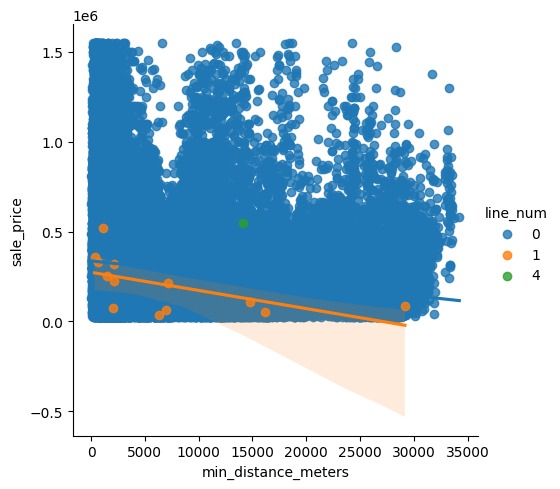

In [18]:
# Plot distance vs price colored by number of lines
sns.lmplot(x="min_distance_meters", y="sale_price", hue='line_num', data=df_lines)
plt.savefig('../docs/figures/distance_vs_price_by_line_num.png', dpi=300, bbox_inches='tight')
plt.show()

### Visualization: Distance vs Price by Station Count

**Visualization shows:** Consistent negative relationship across all station types. Multi-line hubs show slightly different patterns.

## Research Question 3: Property Class and Distance Effects

**Question:** How do property class and distance to CTA jointly influence sale price?

**Variables:** `class`, `min_distance_meters`, `sale_price`

In [19]:
# Ensure property class is categorical
df['class'] = df['class'].astype(str)
print(f"Unique property classes: {sorted(df['class'].unique())}")

Unique property classes: ['202', '203', '204', '205', '206', '207', '208', '209']


### Property Class Definitions

- **202:** One-story home, up to 999 sq ft
- **203:** One-story home, 1,000-1,800 sq ft
- **204:** One-story home, 1,801+ sq ft
- **205:** Two+ story home, 62+ years old, up to 2,200 sq ft
- **206:** Two+ story home, 62+ years old, 2,201-4,999 sq ft
- **207:** Two+ story home, under 62 years old, up to 2,000 sq ft
- **208:** Two+ story home, under 62 years old, 2,001-3,800 sq ft
- **209:** Two+ story home, any age, 5,000+ sq ft

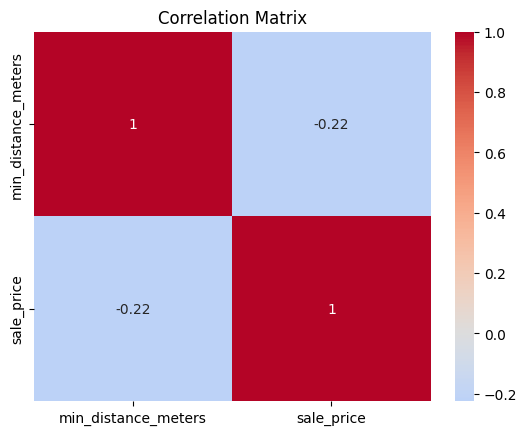

In [20]:
# Check correlation between predictors
corr = df[['class', 'min_distance_meters', 'sale_price']].corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.savefig('../docs/figures/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

### Multicollinearity Check

**Finding:** Low correlation between predictors (|r| < 0.2), no multicollinearity concerns

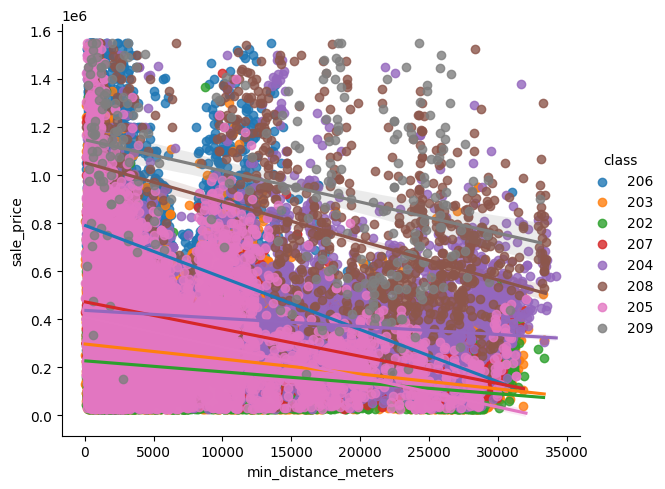

In [21]:
# Plot distance vs price colored by property class
sns.lmplot(
    data=df,
    x='min_distance_meters',
    y='sale_price',
    hue='class',
    aspect=1.2,
)
plt.savefig('../docs/figures/distance_vs_price_by_class.png', dpi=300, bbox_inches='tight')
plt.show()

### Visualization: Distance vs Price by Property Class

In [22]:
# Fit OLS regression with interaction between distance and property class
model = smf.ols('sale_price ~ min_distance_meters * Q("class")', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     5100.
Date:                Sun, 07 Dec 2025   Prob (F-statistic):               0.00
Time:                        17:56:18   Log-Likelihood:            -1.6727e+06
No. Observations:              124438   AIC:                         3.345e+06
Df Residuals:                  124422   BIC:                         3.346e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

### Regression Model: Interactive Effects

**Model Results:**

- **R² = 0.392:** Distance and property class jointly explain ~39% of price variance
- **F-statistic = 4729, p < 0.001:** Model is highly significant
- **Distance effect:** Each meter increases distance → $0.48 decrease in price
  - Per kilometer = ~$480 reduction
- **Class effects:** Larger homes command substantial premiums relative to baseline
- **Interaction terms:** Distance effects vary by property class
  - Class 206 (large older homes) shows steepest distance penalty
  - Class 204 (large one-story) shows flattest relationship

## Summary of Findings

**Q1 - Distance Effect:** Weak but significant negative correlation (r = -0.23)
- Properties further from transit have lower sale prices
- Effect size modest: ~$470 per km of additional distance

**Q2 - Line-Specific Effects:** Modest variation by transit line
- Red Line shows strongest premium (main downtown line)
- Multi-line stations show slight premium
- Overall pattern consistent with general distance effect

**Q3 - Interactive Effects:** Distance and property class jointly explain 39% of variance
- Both factors significantly influence price
- Distance effect consistent across property types
- Larger homes show slightly steeper distance penalty